In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import ast

sns.set_style('white')
sns.palplot(sns.color_palette())

# Sklearn
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, KFold, StratifiedShuffleSplit

df = pd.read_csv('output.csv', sep=',', dtype={'y': object})

%matplotlib inline

In [2]:
df.head(10)

,Unnamed: 0,FCD,FCO,FVD,FVO,G1,G2,G3,GF,RC,RV,S1,S2,S3,T1,T2,T3,cartoes_amarelo,cartoes_vermelho,y
0,0,0.55,0.41,0.55,0.51,0,0.0,0.0,0.0,0,1,SA,SA,SA,60,61,80,1,0,111
1,1,0.72,0.44,0.72,0.43,1,1.0,1.0,1.0,1,0,OFF,DEF,OFF,43,76,84,1,0,010
2,2,0.70,0.43,0.70,0.38,0,0.0,0.0,3.0,1,0,SA,OFF,DEF,55,64,88,2,1,001
3,3,0.57,0.51,0.57,0.41,0,0.0,0.0,1.0,1,0,SA,DEF,DEF,47,49,74,1,0,001
4,4,0.79,0.45,0.79,0.34,1,1.0,1.0,3.0,1,0,DEF,OFF,DEF,43,67,76,1,0,111
5,5,0.71,0.68,0.71,0.64,1,1.0,1.0,0.0,1,0,OFF,SA,SA,58,69,78,2,0,111
6,6,0.59,0.18,0.59,0.53,0,1.0,1.0,-1.0,0,1,SA,SA,SA,5,64,84,1,0,111
7,7,0.59,0.39,0.59,0.55,1,1.0,1.0,0.0,0,1,OFF,DEF,SA,65,66,77,1,0,111
8,8,0.82,0.40,0.82,0.18,0,0.0,0.0,1.0,1,0,DEF,OFF,SA,26,62,88,1,1,001
9,9,0.78,0.55,0.78,0.39,0,0.0,0.0,2.0,1,0,SA,SA,DEF,61,77,86,1,0,111


In [3]:
df['y3'] = df['y'].apply(lambda x: x[2])

In [4]:
df.head(3)

,Unnamed: 0,FCD,FCO,FVD,FVO,G1,G2,G3,GF,RC,...,S1,S2,S3,T1,T2,T3,cartoes_amarelo,cartoes_vermelho,y,y3
0,0,0.55,0.41,0.55,0.51,0,0.0,0.0,0.0,0,...,SA,SA,SA,60,61,80,1,0,111,1
1,1,0.72,0.44,0.72,0.43,1,1.0,1.0,1.0,1,...,OFF,DEF,OFF,43,76,84,1,0,010,0
2,2,0.70,0.43,0.70,0.38,0,0.0,0.0,3.0,1,...,SA,OFF,DEF,55,64,88,2,1,001,1


In [5]:
df[(df['S3'] == 'OFF') & (df['y3'] == '1')].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 25 to 1249
Data columns (total 21 columns):
Unnamed: 0          55 non-null int64
FCD                 55 non-null float64
FCO                 55 non-null float64
FVD                 55 non-null float64
FVO                 55 non-null float64
G1                  55 non-null int64
G2                  55 non-null float64
G3                  55 non-null float64
GF                  55 non-null float64
RC                  55 non-null int64
RV                  55 non-null int64
S1                  55 non-null object
S2                  55 non-null object
S3                  55 non-null object
T1                  55 non-null object
T2                  55 non-null object
T3                  55 non-null object
cartoes_amarelo     55 non-null int64
cartoes_vermelho    55 non-null int64
y                   55 non-null object
y3                  55 non-null object
dtypes: float64(7), int64(6), object(8)
memory usage: 9.5+ KB


In [6]:
df['DOD'] = df['FVO'] - df['FCD']
df['DDO'] = df['FVD'] - df['FCO']

In [7]:
def criarIntervalos(x):
  if (x == -1):
    return x
  if (x == None):
    print('erro')
  if (x == 'INTERVALO'):
    x = 45
  x = int(x)
  if (x <= 15):
    return 0
  elif (x <= 30):
    return 1
  elif (x <= 45):
    return 2
  elif (x <= 60):
    return 3
  elif (x <= 75):
    return 4
  else:
    return 5
  
df['T1'] = df['T1'].apply(criarIntervalos)
df['T2'] = df['T2'].apply(criarIntervalos)
df['T3'] = df['T3'].apply(criarIntervalos)

In [8]:
X = df[['G2', 'S1', 'T1', 'G1', 'S2', 'T2', 'G3', 'T3', 'S3', 'FVD', 'FVO', 'FCD', 'FCO', 'RC', 'RV', 'DOD', 'DDO']]
COLS = X.columns
y = df['y'].astype(str).apply(lambda y: y[2])

In [9]:
df[['G2', 'S1', 'T1', 'G1', 'S2', 'T2', 'G3', 'T3', 'S3', 'FVD', 'FVO', 'FCD', 'FCO', 'RC', 'RV', 'DOD', 'DDO']]

,G2,S1,T1,G1,S2,T2,G3,T3,S3,FVD,FVO,FCD,FCO,RC,RV,DOD,DDO
0,0.0,SA,3,0,SA,4,0.0,5,SA,0.55,0.51,0.55,0.41,0,1,-0.04,0.14
1,1.0,OFF,2,1,DEF,5,1.0,5,OFF,0.72,0.43,0.72,0.44,1,0,-0.29,0.28
2,0.0,SA,3,0,OFF,4,0.0,5,DEF,0.70,0.38,0.70,0.43,1,0,-0.32,0.27
3,0.0,SA,3,0,DEF,3,0.0,4,DEF,0.57,0.41,0.57,0.51,1,0,-0.16,0.06
4,1.0,DEF,2,1,OFF,4,1.0,5,DEF,0.79,0.34,0.79,0.45,1,0,-0.45,0.34
5,1.0,OFF,3,1,SA,4,1.0,5,SA,0.71,0.64,0.71,0.68,1,0,-0.07,0.03
6,1.0,SA,0,0,SA,4,1.0,5,SA,0.59,0.53,0.59,0.18,0,1,-0.06,0.41
7,1.0,OFF,4,1,DEF,4,1.0,5,SA,0.59,0.55,0.59,0.39,0,1,-0.04,0.20
8,0.0,DEF,1,0,OFF,4,0.0,5,SA,0.82,0.18,0.82,0.40,1,0,-0.64,0.42
9,0.0,SA,4,0,SA,5,0.0,5,DEF,0.78,0.39,0.78,0.55,1,0,-0.39,0.23


In [10]:
df['y'].astype(str)

0       111
1       010
2       001
3       001
4       111
5       111
6       111
7       111
8       001
9       111
10      001
11      000
12      110
13      110
14      100
15      010
16      010
17      000
18      111
19      111
20      000
21      111
22      000
23      001
24      010
25      111
26      111
27      001
28      001
29      111
       ... 
1296    011
1297    101
1298    101
1299    010
1300    100
1301    101
1302    111
1303    111
1304    110
1305    111
1306    000
1307    111
1308    110
1309    101
1310    111
1311    110
1312    111
1313    101
1314    001
1315    001
1316    110
1317    011
1318    111
1319    111
1320    111
1321    010
1322    111
1323    011
1324    110
1325    110
Name: y, Length: 1326, dtype: object

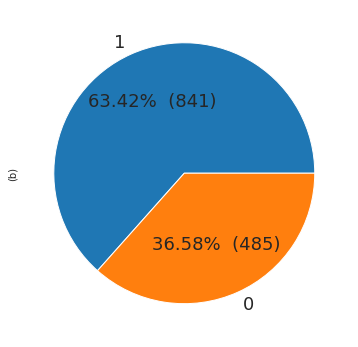

In [11]:
y.value_counts().plot(kind='pie', figsize=(12,6), fontsize=18, title='', autopct=(lambda p : '{:.2f}%  ({:,.0f})'.format(p,p * sum(y.value_counts())/100))).title.set_size(14)
plt.ylabel('(b)')
plt.savefig("y3.svg", format="svg")

In [12]:
X['S1'] = LabelEncoder().fit_transform(X['S1'])
X['S2'] = LabelEncoder().fit_transform(X['S2'])
X['S3'] = LabelEncoder().fit_transform(X['S3'])
df['S1'] = LabelEncoder().fit_transform(df['S1'])
df['S2'] = LabelEncoder().fit_transform(df['S2'])
df['S3'] = LabelEncoder().fit_transform(df['S3'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

# Heatmap

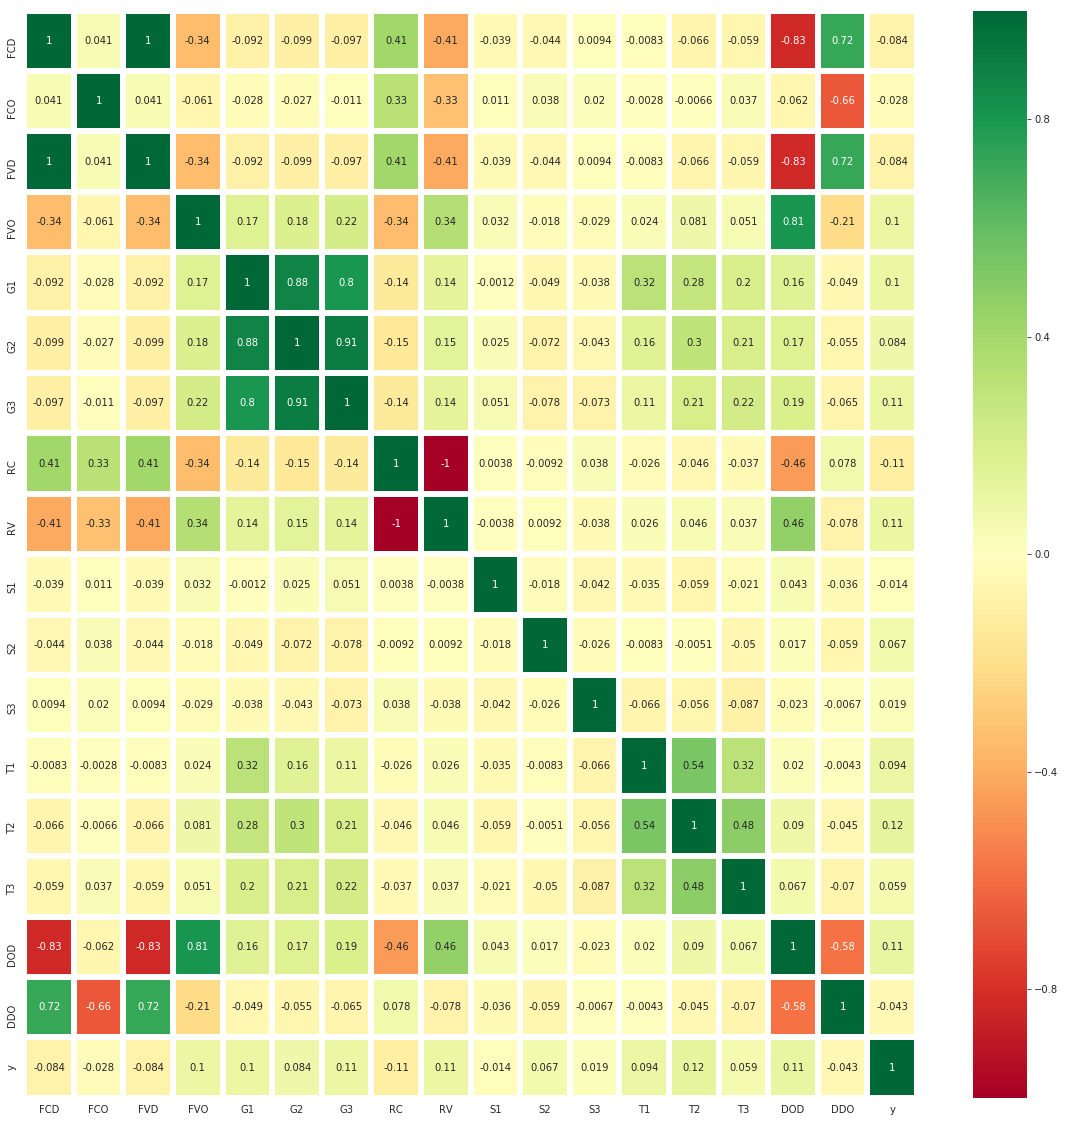

In [13]:
y_ = pd.DataFrame.from_records(y, columns=['y']).astype(str).astype(int)

df_copy = df.copy()
df_copy.drop(['cartoes_amarelo', 'cartoes_vermelho', 'Unnamed: 0', 'y', 'GF'], axis=1, inplace=True)
D = pd.concat([df_copy, y_], axis=1)
corrmat = D.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (20, 20))
#plot mapa de calor
g=sns.heatmap(D[top_corr_features].corr(), linewidth=5, annot=True, cmap="RdYlGn")
plt.savefig("corr_3sub.svg", format="svg")

# Aprendizado de máquina

## Model selection

In [14]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif

COLS = X.columns
selector = SelectKBest(score_func=f_classif, k='all')
X = selector.fit_transform(X,y)
X = pd.DataFrame.from_records(X)

dfscores = pd.DataFrame(selector.scores_)
dfcolumns = pd.DataFrame(COLS)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(17,'Score'))  #print 10 best features

print(selector.get_support(indices=True))

   Specs      Score
5     T2  19.384169
15   DOD  17.669125
6     G3  15.307958
13    RC  14.882458
14    RV  14.882458
3     G1  14.709029
10   FVO  14.526461
2     T1  11.776479
9    FVD   9.475990
11   FCD   9.475990
0     G2   9.354056
4     S2   6.009864
7     T3   4.680325
16   DDO   2.497192
12   FCO   1.062905
8     S3   0.473611
1     S1   0.247314
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


In [15]:
colunas = X.columns

Xt = MinMaxScaler().fit_transform(X)
Xt = pd.DataFrame.from_records(X)
Xt.columns = colunas

# Separação em conjunto de treino e de teste
sss = StratifiedShuffleSplit(n_splits=10, test_size=0.3, train_size=0.7, random_state=42)

for train_index, test_index in sss.split(X, y):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

ssst = StratifiedShuffleSplit(n_splits=10, test_size=0.3, train_size=0.7, random_state=42)

for train_index, test_index in sss.split(Xt, y):
  Xt_train, Xt_test = Xt.iloc[train_index], Xt.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

## Implementação dos classificadores


*   Decision Tree
*   Random Forest
*   SVM
*   KNN


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

[0.85175879 0.83165829 0.81658291 0.86934673 0.83417085 0.81407035
 0.8040201  0.82663317 0.83668342 0.83417085]
RFC: 0.831910 (0.017853)
[0.76130653 0.78894472 0.77386935 0.79648241 0.79648241 0.7839196
 0.77889447 0.78894472 0.77386935 0.7638191 ]
DTR: 0.780653 (0.011841)
[0.79145729 0.78643216 0.8040201  0.78643216 0.80653266 0.7839196
 0.79899497 0.79396985 0.81658291 0.81155779]
SVM: 0.797990 (0.010789)
[0.76633166 0.78643216 0.76633166 0.7839196  0.75879397 0.77386935
 0.73115578 0.77135678 0.76633166 0.77889447]
KNN: 0.768342 (0.014856)


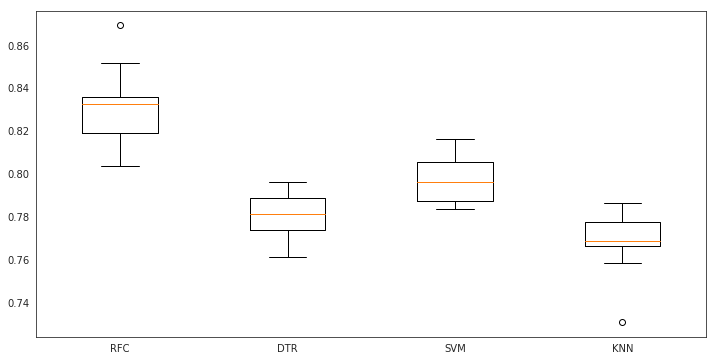

In [16]:
# https://machinelearningmastery.com/compare-machine-learning-algorithms-python-scikit-learn/

# Preparação dos modelos
modelos = [
    ('RFC', RandomForestClassifier(random_state=42)),
    ('DTR', DecisionTreeClassifier(random_state=42)),
    ('SVM', SVC(gamma = 'auto')),
    ('KNN', KNeighborsClassifier())
]

# Testando o desempenho de cada classificador
resultados = []
nomes = []
scoring = 'accuracy'

for nome, modelo in modelos:
  if (nome == 'KNN'):
    resultados_cv = cross_val_score(modelo, Xt, y.values.ravel(), cv=sss, scoring=scoring)
  else:
    resultados_cv = cross_val_score(modelo, X, y.values.ravel(), cv=sss, scoring=scoring)
  resultados.append(resultados_cv)
  print(resultados_cv)
  nomes.append(nome)
  mensagem = "%s: %f (%f)" % (nome, resultados_cv.mean(), resultados_cv.std())
  print (mensagem)
  
# Comparação dos algoritmos
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nomes)
plt.savefig("comparacao-classificadores-2.svg", format="svg")

RFC performance: 

              precision    recall  f1-score   support

           0       0.89      0.72      0.80       146
           1       0.85      0.95      0.90       252

    accuracy                           0.86       398
   macro avg       0.87      0.83      0.85       398
weighted avg       0.87      0.86      0.86       398

Accuracy score: 0.864322
Best params: {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 1000}

Best features: [0.01269678 0.02470048 0.03494175 0.01450496 0.02245625 0.0307594
 0.01976817 0.02121862 0.52482544 0.03225859 0.04382672 0.03087648
 0.05081362 0.0076591  0.00713823 0.04619467 0.07536073]

SVM performance: 

              precision    recall  f1-score   support

           0       0.87      0.49      0.62       146
           1       0.76      0.96      0.85       252

    accuracy                           0.78       398
   macro avg       0.81      0.72      0.74       398
weighted avg       0.80      0.

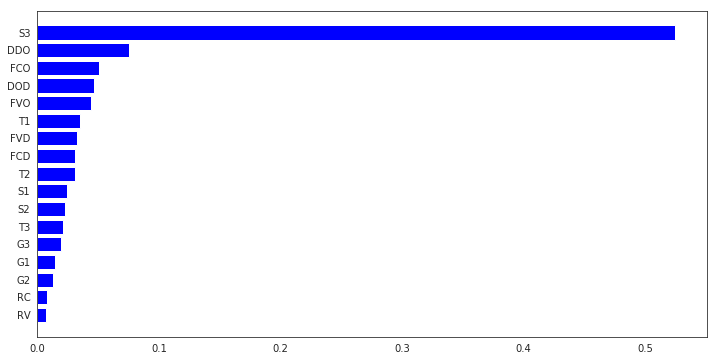

In [17]:
# Escolhi os três primeiros classificadores mais bem colocados: RFC, SVM e ADB

from sklearn.model_selection import GridSearchCV

params_rfc = {
   'n_estimators': [200, 500, 1000],
   'max_features': ['auto', 'sqrt', 'log2'],
   'max_depth' : [4,5,6,7,8],
   'criterion' :['gini', 'entropy'],
}

params_svm = {
    'kernel': ['linear', 'rbf'],
    'C': [1, 0.25, 0.5, 0.75],
    'gamma': [1, 2, 3, 'auto'],
    'decision_function_shape': ['ovo', 'ovr'],
    'shrinking': [True, False]
}

params_dtr = {
    'max_depth': [3, None],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy']
}

params_knn = {
    'n_neighbors': [3,5,11,19],
    'weights':['uniform', 'distance'],
    'metric':['euclidean', 'manhattan']
}

melhores_modelos = [
    ('RFC', RandomForestClassifier(), params_rfc),
    ('SVM', SVC(), params_svm),
    ('DTR', DecisionTreeClassifier(), params_dtr)
]

for nome, modelo, params in melhores_modelos:
    print(nome, "performance: \n")
    grid_search = GridSearchCV(modelo, param_grid=params, scoring="accuracy", cv=sss)
    
    if (nome == 'KNN'):
        m = grid_search.fit(Xt_train, y_train.values.ravel())
        pred = m.predict(Xt_test)
    else:
        m = grid_search.fit(X_train, y_train.values.ravel())
        pred = m.predict(X_test)

    print(classification_report(y_test.values.ravel(), pred))
    print("Accuracy score: {:.6f}".format(accuracy_score(y_test, pred)))
    print("Best params: {}\n".format(grid_search.best_params_))
    if nome == 'RFC':
        print("Best features: {}\n".format(m.best_estimator_.feature_importances_))
        importances = m.best_estimator_.feature_importances_
        indices = np.argsort(importances)
        
        plt.figure(figsize=(12,6))
        plt.barh(range(len(indices)), importances[indices], color='b', align='center')
        plt.yticks(range(len(indices)), [COLS[i] for i in indices])
        plt.savefig("feature_importances_3sub_com_otimizacao.svg", format="svg")

In [18]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif

colunas = X_train.columns
s = SelectKBest(chi2, k=3)
X_new = s.fit(X_train, y_train)
print(colunas[X_new.get_support()])

ValueError: Input X must be non-negative.

In [ ]:
xx = pd.DataFrame.from_records(df['S3'].astype(str))
clf = DecisionTreeClassifier().fit(xx, y)
#print (clf.predict(X_test))

In [ ]:
d = pd.concat([X, y])